<a href="https://colab.research.google.com/github/haraleks/ds_school_2020/blob/master/Task2_Aleksandr_Kharchenko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
# pip install seaborn 
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

In [0]:
from google.colab import files
uploaded = files.upload()

https://habr.com/ru/company/ods/blog/322534/#derevo-resheniy

#Creat train and test database

In [0]:
df = pd.read_csv('houses_to_rent_v2.csv')

In [6]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [0]:
columns_to_show = 'rent amount (R$)'
df.groupby(['city'])[columns_to_show].describe(percentiles=[])

,count,mean,std,min,50%,max
city,,,,,,
Belo Horizonte,1258.0,3664.127981,3493.664840,450.0,2300.0,15000.0
Campinas,853.0,2364.290739,2310.903378,500.0,1500.0,15000.0
Porto Alegre,1193.0,2337.699916,2199.696033,500.0,1650.0,19000.0
Rio de Janeiro,1501.0,3232.904064,2804.265614,500.0,2300.0,15000.0
São Paulo,5887.0,4652.793783,3634.612007,500.0,3400.0,45000.0


In [0]:
# class 1: <1000 class 2: 1000 - 3400 class 3: >3500

In [0]:
data = df.copy()

In [26]:
data['floor'].unique()

array([  7,  20,   6,   2,   1,   4,   3,  10,  11,  24,   9,   8,  17,
        18,   5,  13,  15,  16,  14,  26,  12,  21,  19,  22,  27,  23,
        35,  25,  46,  28,  29, 301,  51,  32])

In [0]:
data = data.drop(data[data['floor']=='-'].index)

In [0]:
data['floor'] = pd.to_numeric(data['floor'])

In [7]:
data['floor']

0         7
1        20
2         6
3         2
4         1
         ..
10686     8
10687     5
10688    17
10689     8
10690     8
Name: floor, Length: 8231, dtype: int64

##Creat 2 classs

0 - стоимость до 2000 1 -  более 2000

In [0]:
df_1 = data[data['rent amount (R$)'] < 3000]
df_2 = data[(data['rent amount (R$)'] > 3000)]

In [136]:
df_1.shape

(4838, 14)

In [0]:
df_1['class'] = 0
df_2['class'] = 1

In [0]:
df_new = pd.DataFrame()
df_new = df_new.append(df_1)
df_new = df_new.append(df_2)

In [137]:
df_new['floor'].unique()

array([  6,   2,   1,   7,  10,  11,   8,  17,  18,   5,   3,  13,   4,
         9,  20,  14,  15,  26,  24,  16,  12,  23,  19,  21,  25,  22,
       301,  51,  27,  35,  46,  28,  29,  32])

In [0]:
y1 = df_new['class']

In [0]:
x1 = df_new[['rooms','bathroom','parking spaces', 'floor', 'rent amount (R$)']]

In [0]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2)

In [0]:
x_train, x_test = train_test_split(df_new, test_size=0.2)

#DecisionTreeClassifier

In [0]:
param = []
param1 = []
param2 = []

In [0]:
param3 = []

In [32]:
pip install pydot

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
import pydot
import os
from PIL import Image


In [0]:
# Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей визуализации.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [0]:
df_1['class']

In [0]:
d1 = df_1['rent amount (R$)']
d2 = df_2['rent amount (R$)']
train_data = np.r_[d1, d2]
train_labels = np.r_[df_1['class'], df_2['class']]

In [0]:
os.mkdir('./img')

In [66]:
x_train_sort = x_train.sort_values('rooms', ascending=False)
x_train_sort.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),class
4634,Belo Horizonte,156,7,2,1,3,acept,not furnished,350,2200,187,30,2767,0
1946,Rio de Janeiro,600,7,6,1,12,not acept,furnished,1300,15000,1167,194,17660,1
4541,São Paulo,400,6,6,8,15,acept,furnished,3000,4335,1750,55,9140,1
981,São Paulo,183,6,5,2,2,not acept,not furnished,800,3800,25,58,4683,1
1467,Belo Horizonte,420,6,4,0,5,acept,not furnished,927,3500,405,47,4879,1


In [0]:
age_tree = DecisionTreeClassifier(random_state=17)
age_tree.fit(x_train1['rooms'].values.reshape(-1, 1), y_train1.values)

export_graphviz(age_tree, feature_names=['rooms'], 
out_file='./img/age_tree.dot', filled=True)
!dot -Tpng './img/age_tree.dot' -o './img/age_tree.png'

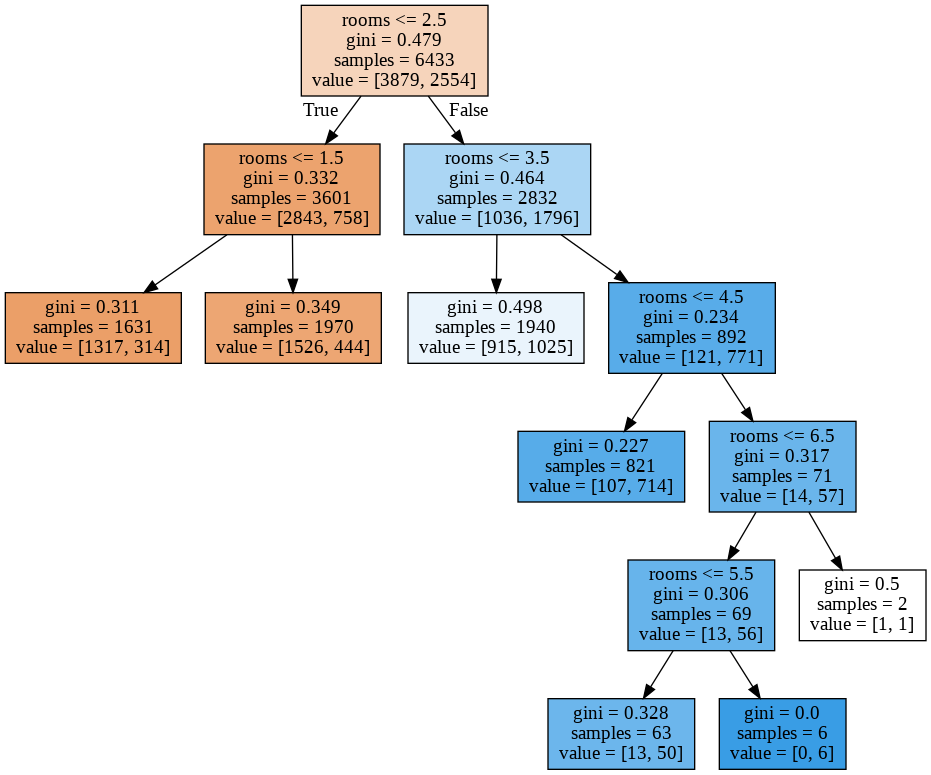

In [93]:
image = Image.open('/content/img/age_tree.png')
image

In [0]:
tree_pred = age_tree.predict(x_test1['rooms'].values.reshape(-1, 1))
acc = round(accuracy_score(y_test1.values, tree_pred),4)

In [266]:
acc

0.7228

In [0]:
param.append(acc)

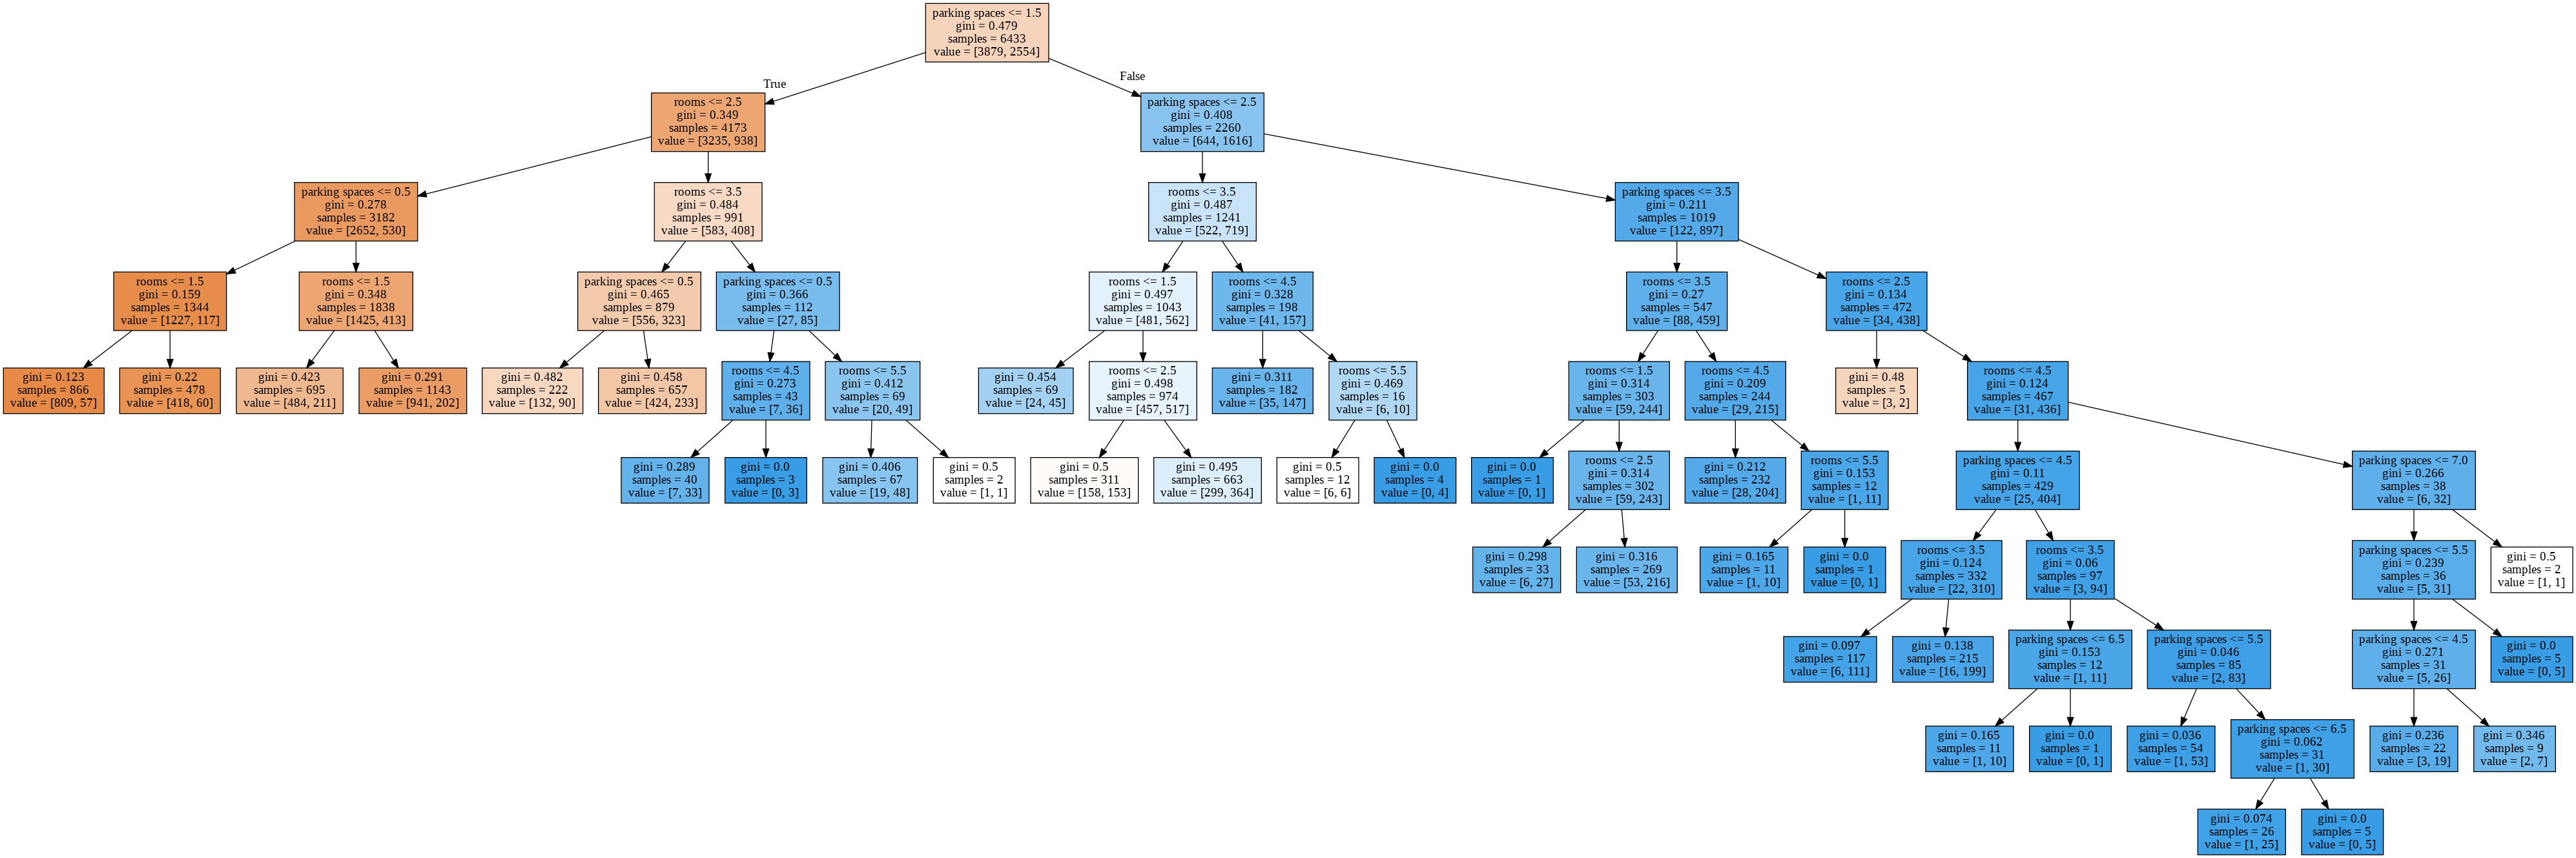

In [120]:
age_tree1 = DecisionTreeClassifier(random_state=17)
age_tree1.fit(x_train1[['rooms','parking spaces']].values, y_train1.values)


export_graphviz(age_tree, feature_names=['rooms','parking spaces'], 
out_file='./img/age_tree2.dot', filled=True)
!dot -Tpng './img/age_tree2.dot' -o './img/age_tree2.png'
image = Image.open('/content/img/age_tree2.png')
image

In [0]:
tree_pred2 = age_tree1.predict(x_test1[['rooms','parking spaces']].values)
acc1 = round(accuracy_score(y_test1.values, tree_pred2),4)

In [0]:
param1.append(acc1)

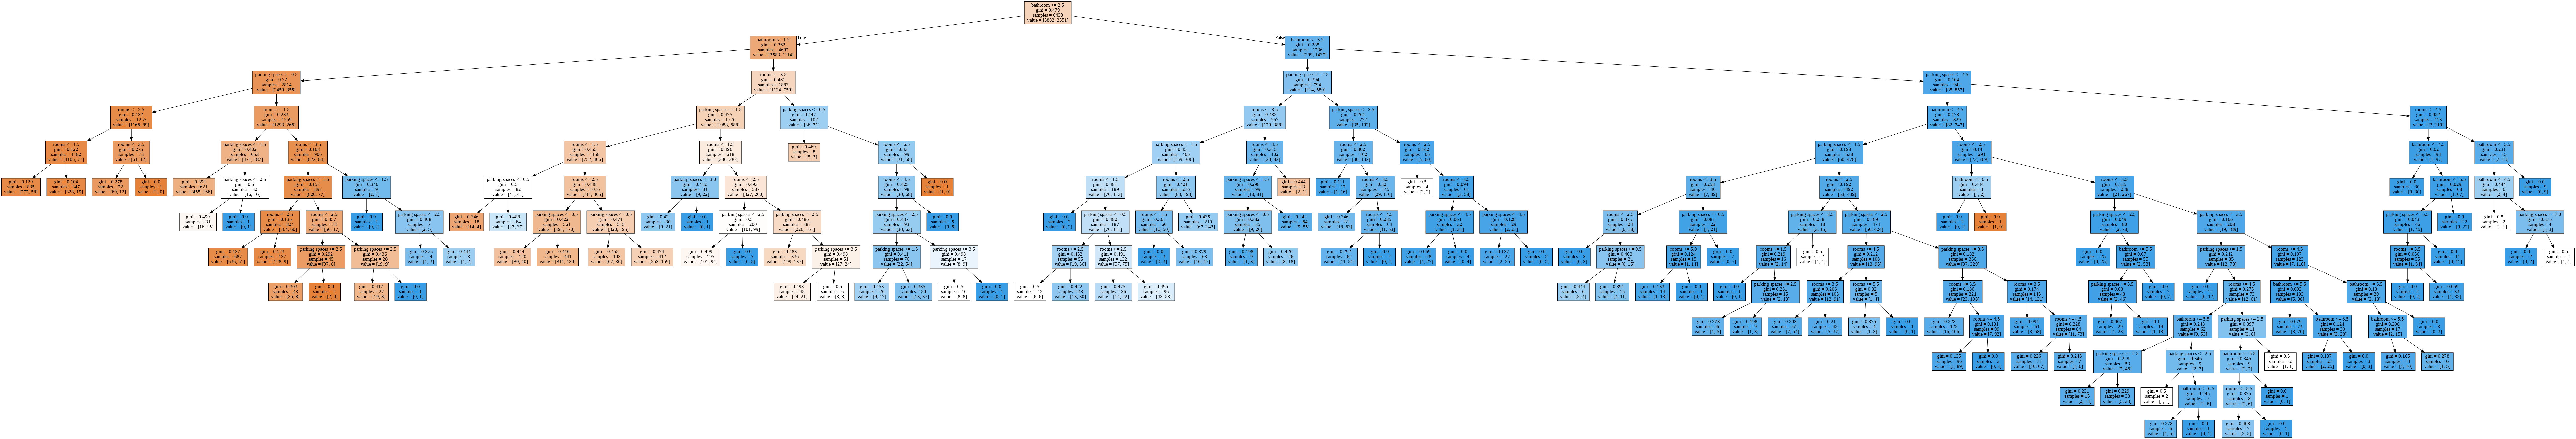

In [123]:
age_tree2 = DecisionTreeClassifier(random_state=17)
age_tree2.fit(x_train_sort[['rooms','bathroom','parking spaces']].values, x_train_sort['class'].values)


export_graphviz(age_tree2, feature_names=['rooms','bathroom','parking spaces'], 
out_file='./img/age_tree3.dot', filled=True)
!dot -Tpng './img/age_tree3.dot' -o './img/age_tree3.png'
image = Image.open('/content/img/age_tree3.png')
image

In [0]:
tree_pred2 = age_tree2.predict(x_test1[['rooms','bathroom','parking spaces']].values)
acc2 = round(accuracy_score(y_test1.values, tree_pred2),4)

In [271]:
acc2

0.7955

In [0]:
param2.append(acc2)

In [0]:
age_tree3 = DecisionTreeClassifier(random_state=17)
age_tree3.fit(x_train_sort[['rooms','bathroom','parking spaces','floor']].values, x_train_sort['class'].values)
tree_pred3 = age_tree3.predict(x_test1[['rooms','bathroom','parking spaces','floor']].values)
acc3 = round(accuracy_score(y_test1.values, tree_pred3),4)
param3.append(acc3)

In [302]:
acc3

0.8142

#LogisticRegression

In [0]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

In [299]:
log_reg = LogisticRegression(random_state=17)
log_reg.fit(x_train1['rooms'].values.reshape(-1, 1), y_train1.values)
accuracy_score(y_test1.values, log_reg.predict(x_test1['rooms'].values.reshape(-1, 1)))

0.7228091982597887

In [0]:
acc = round(accuracy_score(y_test1.values, log_reg.predict(x_test1['rooms'].values.reshape(-1, 1))),4)
param.append(acc)

In [200]:
log_reg1 = LogisticRegression(random_state=17)
log_reg1.fit(x_train1[['rooms','parking spaces']].values, y_train1.values)
accuracy_score(y_test1.values, log_reg1.predict(x_test1[['rooms','parking spaces']].values))

0.7613424487259167

In [0]:
acc = round(accuracy_score(y_test1.values, log_reg1.predict(x_test1[['rooms','parking spaces']].values)),4)
param1.append(acc)

In [202]:
log_reg2 = LogisticRegression(random_state=17)
log_reg2.fit(x_train1[['rooms','bathroom','parking spaces']].values, y_train1.values)
accuracy_score(y_test1.values, log_reg2.predict(x_test1[['rooms','bathroom','parking spaces']].values))

0.7905531385954009

In [0]:
acc = round(accuracy_score(y_test1.values, log_reg2.predict(x_test1[['rooms','bathroom','parking spaces']].values)),4)
param2.append(acc)

In [276]:
param2

[0.7955, 0.7906]

In [0]:
log_reg3 = LogisticRegression(random_state=17)
log_reg3.fit(x_train1[['rooms','bathroom','parking spaces', 'floor']].values, y_train1.values)
acc3 = round(accuracy_score(y_test1.values, log_reg3.predict(x_test1[['rooms','bathroom','parking spaces','floor']].values)),4)
param3.append(acc3)

In [304]:
acc3

0.7974

#SGDClassifier

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import validation_curve, learning_curve
from matplotlib import pyplot as plt

In [206]:
sgdc = SGDClassifier(random_state=17)
sgdc.fit(x_train1['rooms'].values.reshape(-1, 1), y_train1.values)
accuracy_score(y_test1.values, sgdc.predict(x_test1['rooms'].values.reshape(-1, 1)))

0.7228091982597887

In [0]:
acc = round(accuracy_score(y_test1.values, sgdc.predict(x_test1['rooms'].values.reshape(-1, 1))),4)
param.append(acc)

In [207]:
sgdc1 = SGDClassifier(random_state=17)
sgdc1.fit(x_train1[['rooms','parking spaces']].values, y_train1.values)
accuracy_score(y_test1.values, sgdc1.predict(x_test1[['rooms','parking spaces']].values))

0.7625854568054692

In [0]:
acc1 = round(accuracy_score(y_test1.values, sgdc1.predict(x_test1[['rooms','parking spaces']].values)),4)
param1.append(acc1)

In [208]:
sgdc2 = SGDClassifier(random_state=17)
sgdc2.fit(x_train1[['rooms','bathroom','parking spaces']].values, y_train1.values)
accuracy_score(y_test1.values, sgdc2.predict(x_test1[['rooms','bathroom','parking spaces']].values))

0.7464263517712865

In [0]:
acc2 = round(accuracy_score(y_test1.values, sgdc2.predict(x_test1[['rooms','bathroom','parking spaces']].values)),4)
param2.append(acc2)

In [0]:
sgdc3 = SGDClassifier(random_state=17)
sgdc3.fit(x_train1[['rooms','bathroom','parking spaces', 'floor']].values, y_train1.values)
acc3 = round(accuracy_score(y_test1.values, sgdc3.predict(x_test1[['rooms','bathroom','parking spaces', 'floor']].values)),4)
param3.append(acc3)

In [306]:
acc3

0.77

#KNN

In [223]:
name = 'knn_room'
knn_room = KNeighborsClassifier(n_neighbors=10)
knn_room.fit(x_train1['rooms'].values.reshape(-1, 1), y_train1.values)
accuracy_score(y_test1.values, knn_room.predict(x_test1['rooms'].values.reshape(-1, 1)))

0.7228091982597887

In [0]:
acc = round(accuracy_score(y_test1.values, knn_room.predict(x_test1['rooms'].values.reshape(-1, 1))),4)
param.append(acc)

In [221]:
name = 'knn_room1'
knn_room1 = KNeighborsClassifier(n_neighbors=10)
knn_room1.fit(x_train1[['rooms','parking spaces']].values, y_train1.values)
accuracy_score(y_test1.values, knn_room1.predict(x_test1[['rooms','parking spaces']].values))

0.7414543194530765

In [0]:
acc1 = round(accuracy_score(y_test1.values, knn_room1.predict(x_test1[['rooms','parking spaces']].values)),4)
param1.append(acc1)

In [220]:
name = 'knn_room2'
knn_room2 = KNeighborsClassifier(n_neighbors=10)
knn_room2.fit(x_train1[['rooms','bathroom','parking spaces']].values, y_train1.values)
accuracy_score(y_test1.values, knn_room2.predict(x_test1[['rooms','bathroom','parking spaces']].values))

0.7949036668738346

In [0]:
acc2 = round(accuracy_score(y_test1.values, knn_room2.predict(x_test1[['rooms','bathroom','parking spaces']].values)),4)
param2.append(acc2)

In [0]:
knn_room3 = KNeighborsClassifier(n_neighbors=10)
knn_room3.fit(x_train1[['rooms','bathroom','parking spaces','floor']].values, y_train1.values)
acc3 = round(accuracy_score(y_test1.values, knn_room3.predict(x_test1[['rooms','bathroom','parking spaces','floor']].values)),4)
param3.append(acc3)

In [308]:
acc3

0.7874

#RandomForestClassifier

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [219]:
forest = RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=17)
forest.fit(x_train1['rooms'].values.reshape(-1, 1), y_train1.values)
accuracy_score(y_test1.values, forest.predict(x_test1['rooms'].values.reshape(-1, 1)))

0.7228091982597887

In [0]:
acc = round(accuracy_score(y_test1.values, forest.predict(x_test1['rooms'].values.reshape(-1, 1))),4)
param.append(acc)

In [217]:
forest1 = RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=17)
forest1.fit(x_train1[['rooms','parking spaces']].values, y_train1.values)
accuracy_score(y_test1.values, forest1.predict(x_test1[['rooms', 'parking spaces']].values))

0.761963952765693

In [0]:
acc1 = round(accuracy_score(y_test1.values, forest1.predict(x_test1[['rooms', 'parking spaces']].values)),4)
param1.append(acc1)

In [214]:
forest2 = RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=17)
forest2.fit(x_train1[['rooms','bathroom','parking spaces']].values, y_train1.values)
accuracy_score(y_test1.values, forest2.predict(x_test1[['rooms','bathroom','parking spaces']].values))

0.7924176507147297

In [0]:
acc2 = round(accuracy_score(y_test1.values, forest2.predict(x_test1[['rooms','bathroom','parking spaces']].values)),4)
param2.append(acc2)

In [310]:
forest3 = RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=17)
forest3.fit(x_train1[['rooms','bathroom','parking spaces','floor']].values, y_train1.values)
acc3 = round(accuracy_score(y_test1.values, forest3.predict(x_test1[['rooms','bathroom','parking spaces','floor']].values)),4)
param3.append(acc3)
acc3

0.7775

#GradientBoostingClassifier

In [0]:
name = 'GradientBoostingClassifier'

In [298]:
gradient = GradientBoostingClassifier(random_state=17)
gradient.fit(x_train1['rooms'].values.reshape(-1, 1), y_train1.values)
accuracy_score(y_test1.values, gradient.predict(x_test1['rooms'].values.reshape(-1, 1)))

0.7228091982597887

In [0]:
acc = round(accuracy_score(y_test1.values, gradient.predict(x_test1['rooms'].values.reshape(-1, 1))),4)
param.append(acc)

In [215]:
gradient1 = GradientBoostingClassifier(random_state=17)
gradient1.fit(x_train1[['rooms','parking spaces']].values, y_train1.values)
accuracy_score(y_test1.values, gradient1.predict(x_test1[['rooms','parking spaces']].values))

0.761963952765693

In [0]:
acc1 = round(accuracy_score(y_test1.values, gradient1.predict(x_test1[['rooms','parking spaces']].values)),4)
param1.append(acc1)

In [213]:
gradient2 = GradientBoostingClassifier(random_state=17)
gradient2.fit(x_train1[['rooms','bathroom','parking spaces']].values, y_train1.values)
accuracy_score(y_test1.values, gradient2.predict(x_test1[['rooms','bathroom','parking spaces']].values))

0.7905531385954009

In [0]:
acc2 = round(accuracy_score(y_test1.values, gradient2.predict(x_test1[['rooms','bathroom','parking spaces']].values)),4)
param2.append(acc2)

In [311]:
gradient3 = GradientBoostingClassifier(random_state=17)
gradient3.fit(x_train1[['rooms','bathroom','parking spaces','floor']].values, y_train1.values)
acc3 = round(accuracy_score(y_test1.values, gradient3.predict(x_test1[['rooms','bathroom','parking spaces','floor']].values)),4)
param3.append(acc3)
acc3

0.8017

#conclusion

---



In [0]:
models = 'DecisionTreeClassifier LogisticRegression SGDClassifier KNeighborsClassifier RandomForestClassifier GradientBoostingClassifier'.split()

In [0]:
chart = pd.DataFrame()

In [0]:
chart['models'] = models
chart['param'] = param
chart['param1'] = param1
chart['param2'] = param2

In [0]:
chart['param3'] = param3

In [318]:
chart.sort_values('param3', ascending=False).reset_index(drop=True)

,models,param,param1,param2,param3
0,DecisionTreeClassifier,0.7228,0.7557,0.7955,0.8142
1,GradientBoostingClassifier,0.7228,0.7620,0.7906,0.8017
2,LogisticRegression,0.7228,0.7613,0.7906,0.7974
3,KNeighborsClassifier,0.7228,0.7415,0.7949,0.7874
4,RandomForestClassifier,0.7228,0.7620,0.7924,0.7775
5,SGDClassifier,0.7228,0.7626,0.7464,0.7700


<p>Param = 'rooms'</p>
<p>Param1 = 'rooms','parking spaces'</p>
<p>Param2 = 'rooms','bathroom','parking spaces'</p>
<p>Param3 = 'rooms','bathroom','parking spaces','floor'</p>





The more parametrs are included, the more accurate the predict.  
The best model is DecisionTreeClassifier